In [20]:
from matplotlib import pyplot as plt
import librosa
import librosa.display
import numpy as np
from glob import glob


In [22]:
PATH = 'C:/Users/Андрій/OneDrive/Робочий стіл/Python/music_synthesis/results/*.wav'
SAMPLE_RATE = 22050

In [23]:
audio_files = glob(PATH)
audio_files_data = list(map(librosa.load, audio_files))

audio_files

['C:/Users/Андрій/OneDrive/Робочий стіл/Python/music_synthesis/results\\res1.wav',
 'C:/Users/Андрій/OneDrive/Робочий стіл/Python/music_synthesis/results\\res2.wav',
 'C:/Users/Андрій/OneDrive/Робочий стіл/Python/music_synthesis/results\\res3.wav',
 'C:/Users/Андрій/OneDrive/Робочий стіл/Python/music_synthesis/results\\res4.wav',
 'C:/Users/Андрій/OneDrive/Робочий стіл/Python/music_synthesis/results\\res5.wav',
 'C:/Users/Андрій/OneDrive/Робочий стіл/Python/music_synthesis/results\\res6.wav']

In [24]:
def plot_waveform(ax, y, sr):
    librosa.display.waveshow(y, sr=sr, ax=ax)
    ax.set_title("Waveform")
    ax.set_xlabel("Time (s)")
    ax.set_ylabel("Amplitude")

In [25]:
def plot_fft(ax, y, sr):
    n = len(y)
    Y = np.fft.fft(y)
    freqs = np.fft.fftfreq(n, 1/sr)
    ax.plot(freqs[:n // 2], np.abs(Y[:n // 2]))
    ax.set_title("Frequency Spectrum")
    ax.set_xlabel("Frequency (Hz)")
    ax.set_ylabel("Magnitude")

In [26]:
def plot_spectrogram(ax, y, sr):
    S = librosa.stft(y)
    S_db = librosa.amplitude_to_db(np.abs(S), ref=np.max)
    img = librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='log', ax=ax)
    ax.set_title("Spectrogram (dB)")
    plt.colorbar(img, ax=ax, format="%+2.0f dB")

In [27]:
def plot_mel_spectrogram(ax, y, sr):
    mel = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
    mel_db = librosa.amplitude_to_db(mel, ref=np.max)
    img = librosa.display.specshow(mel_db, x_axis='time', y_axis='mel', sr=sr, ax=ax)
    ax.set_title("Mel Spectrogram")
    plt.colorbar(img, ax=ax, format="%+2.0f dB")

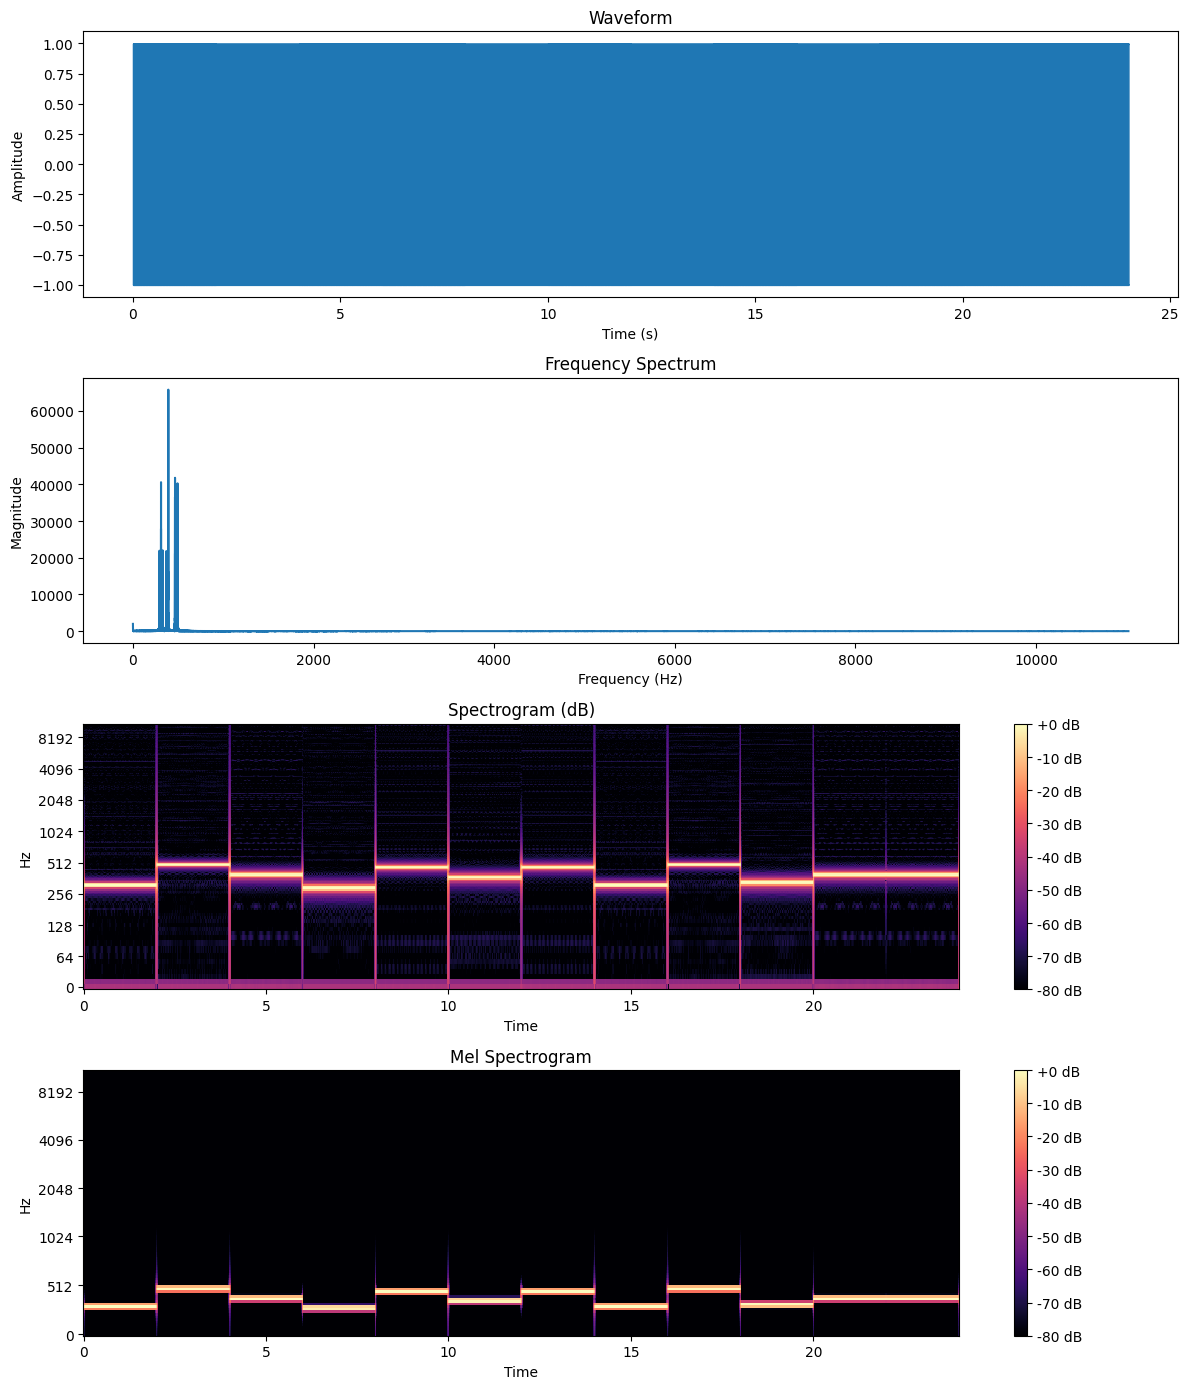

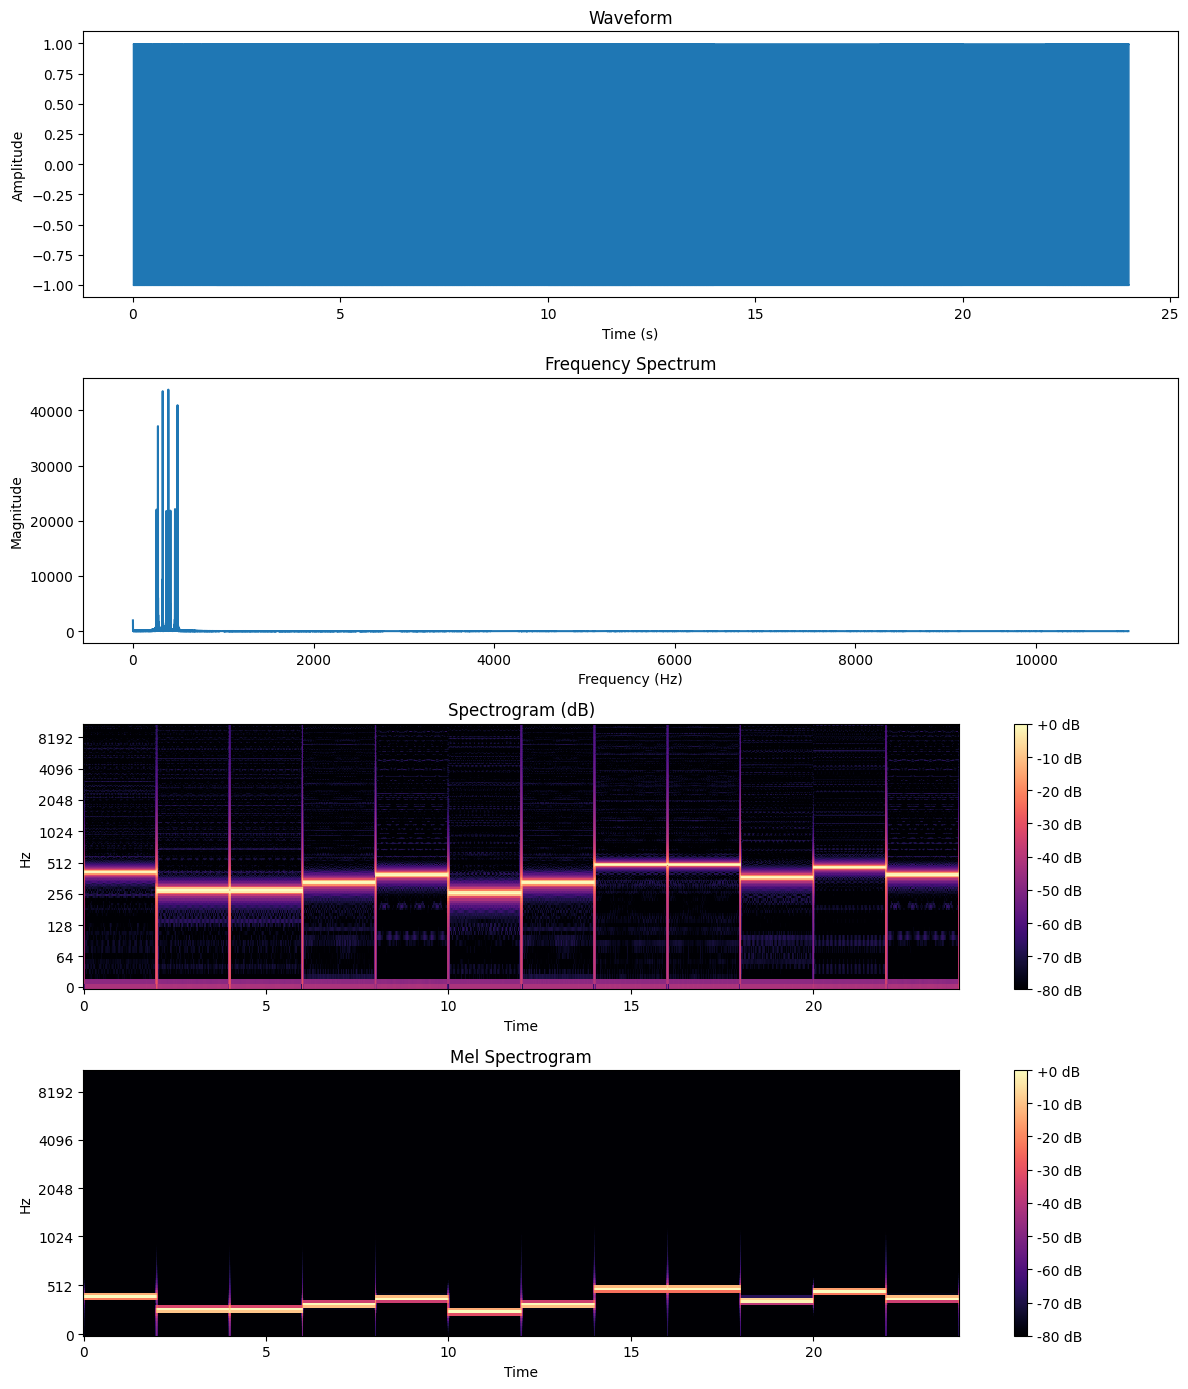

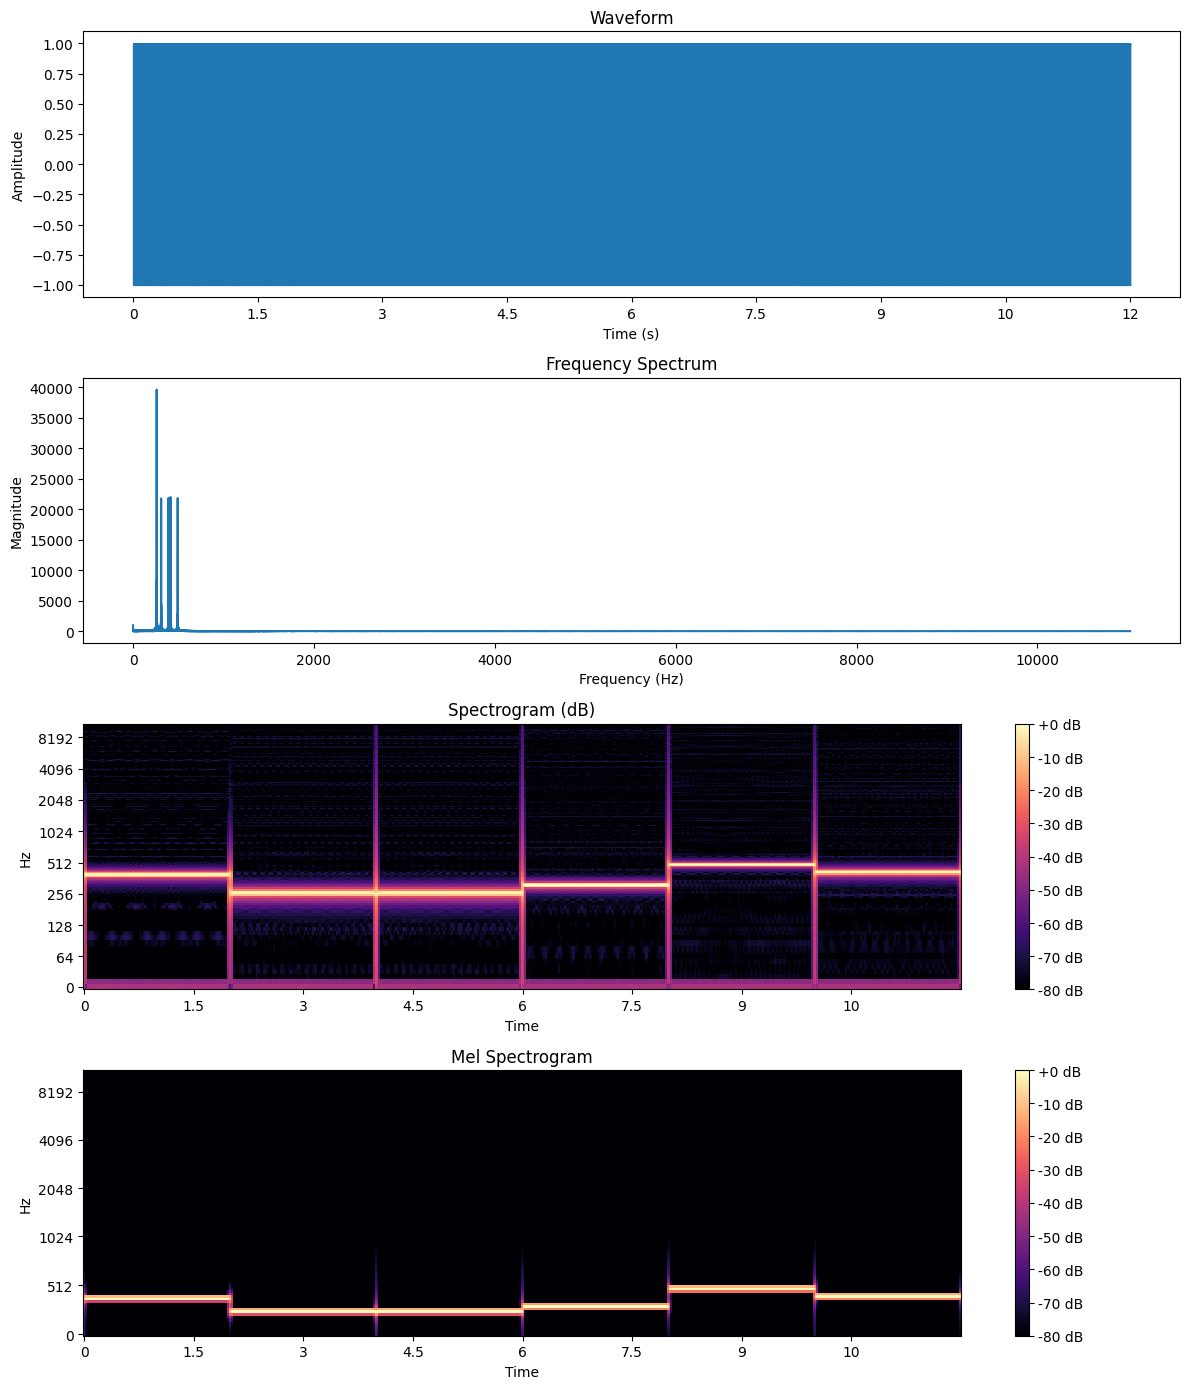

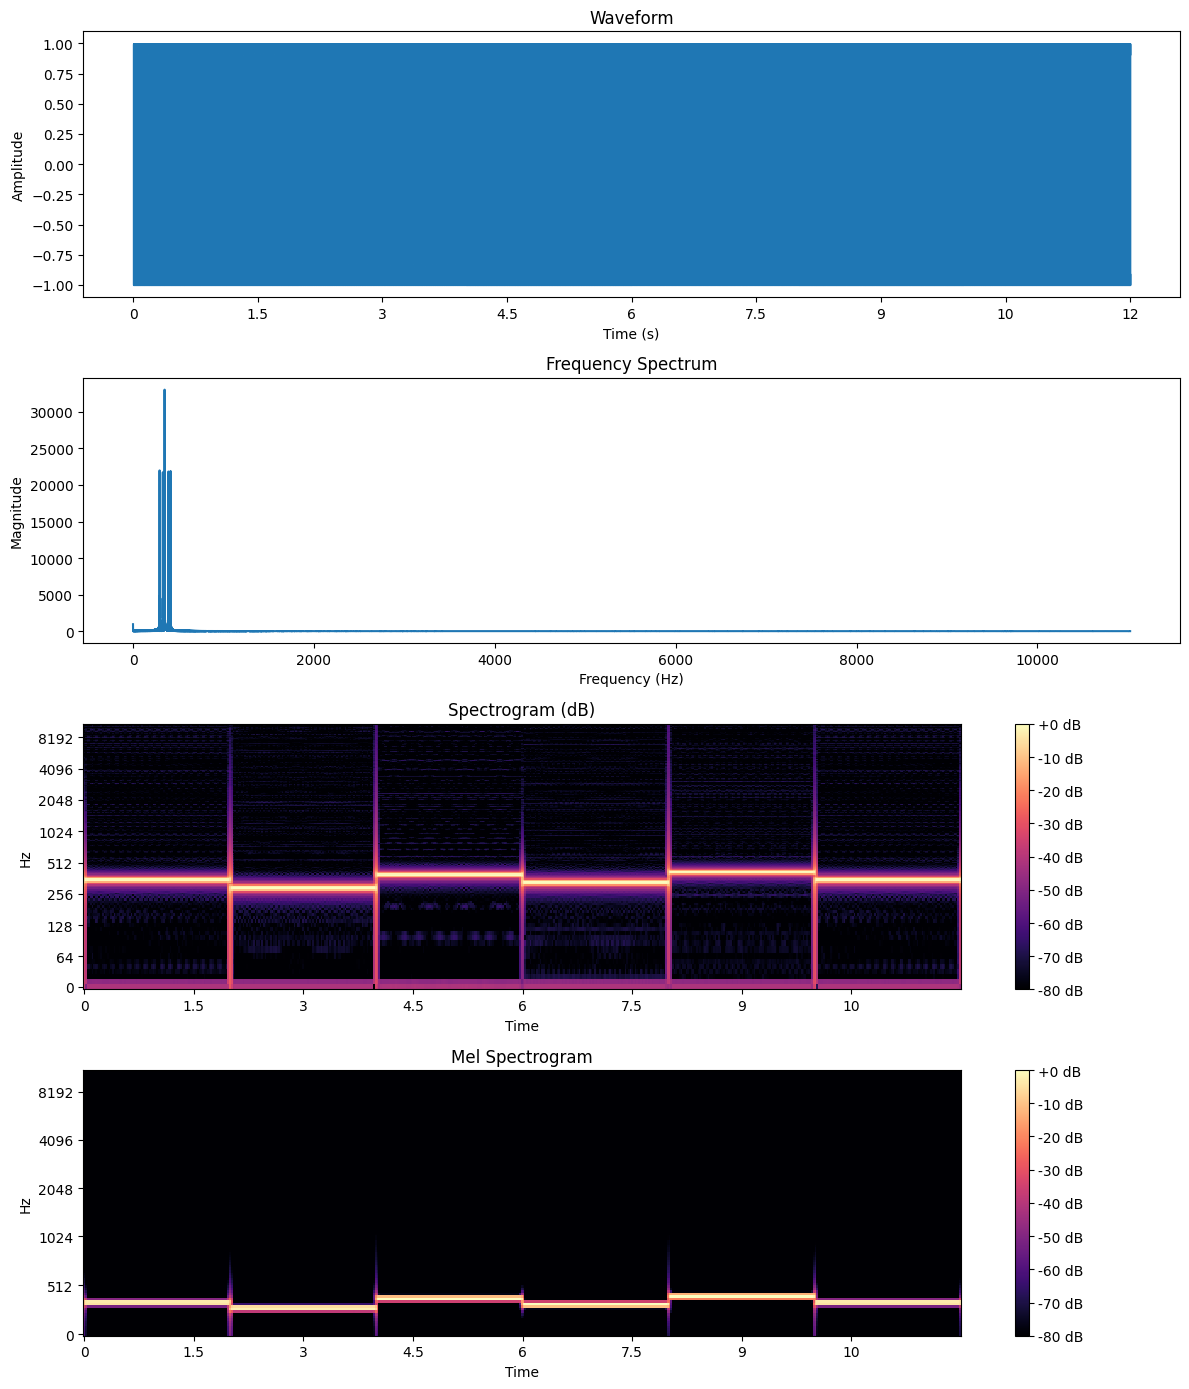

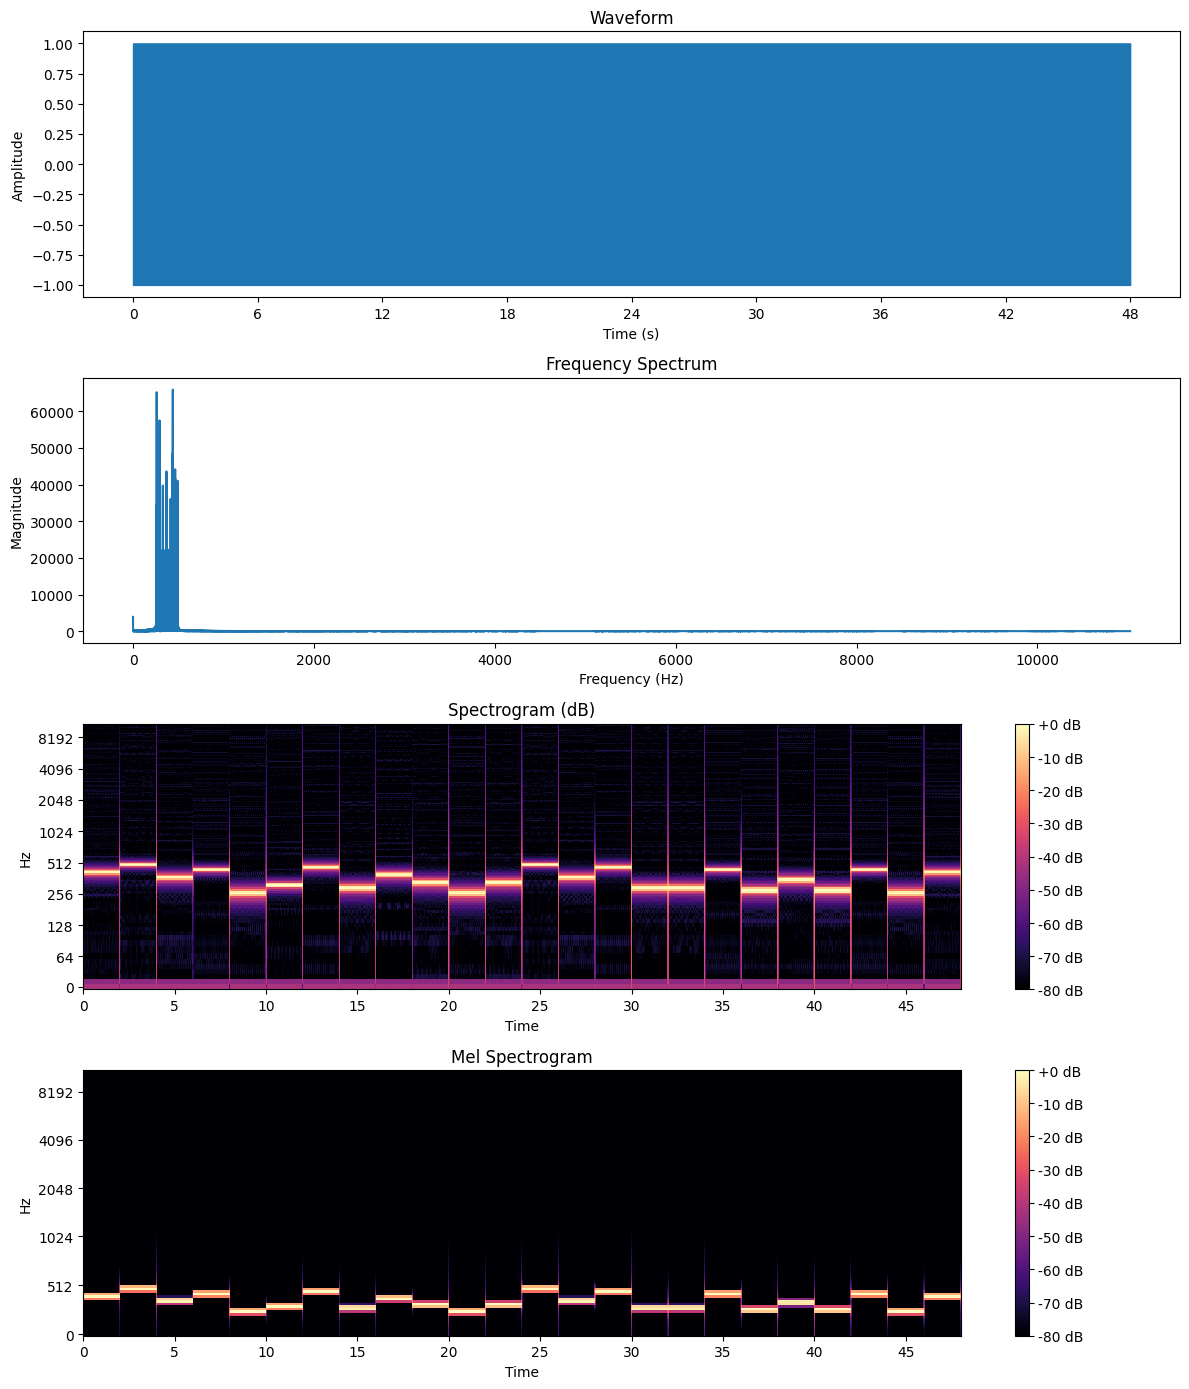

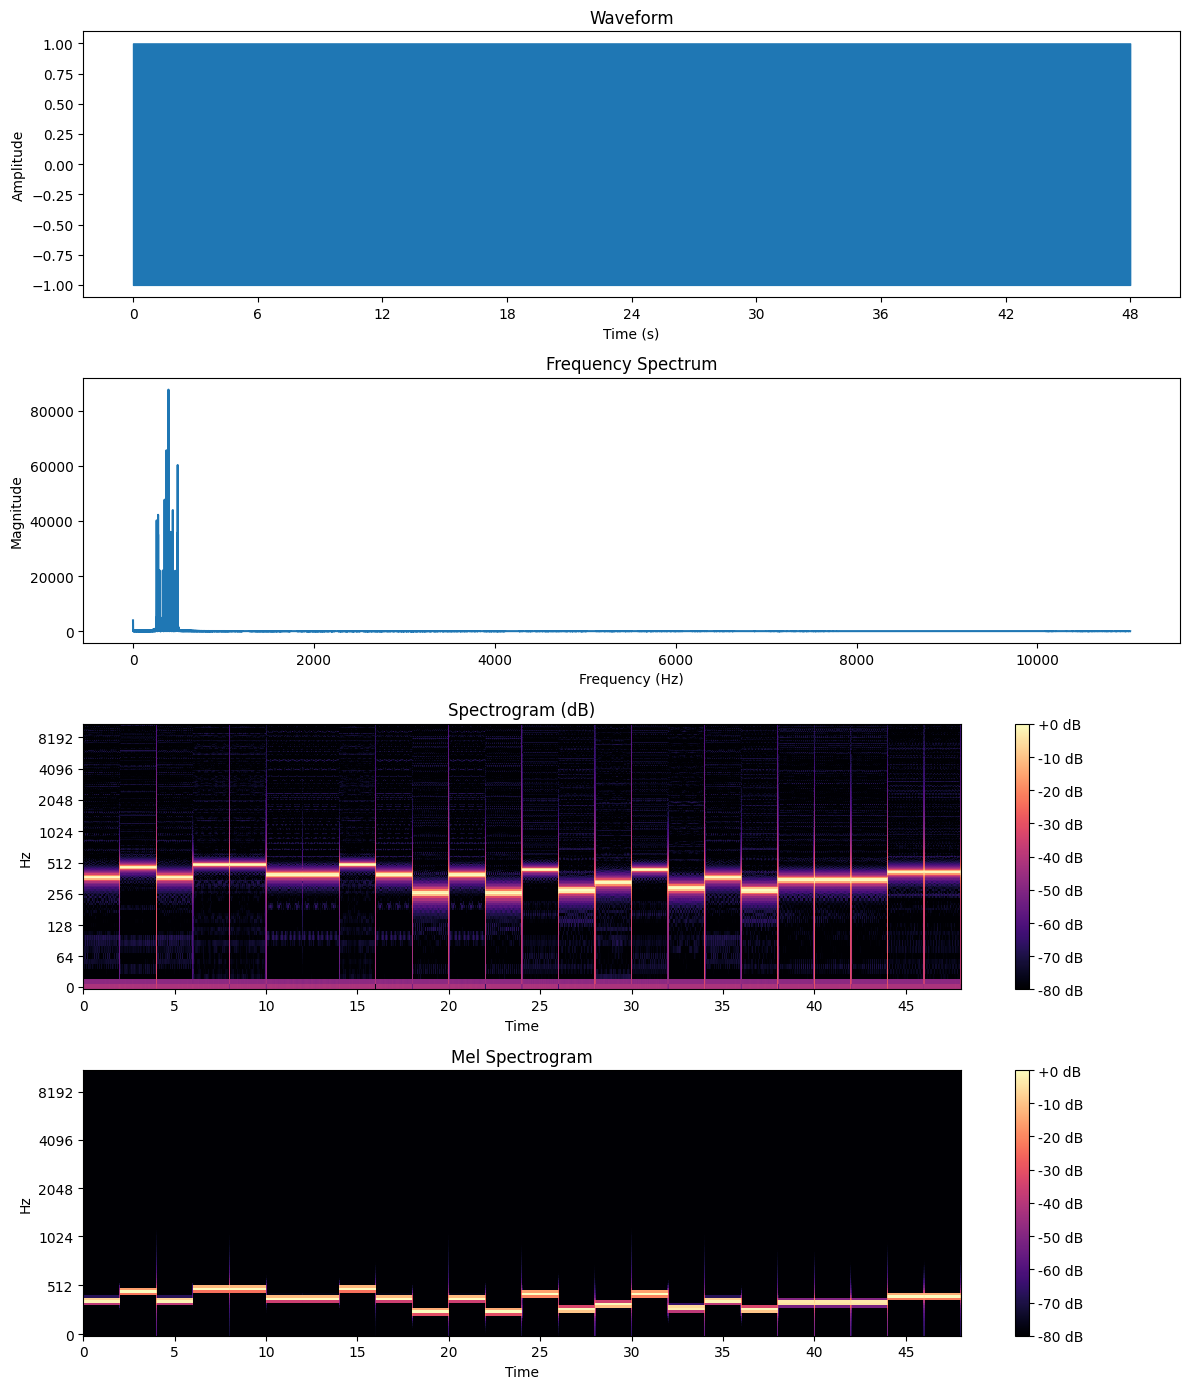

In [32]:
for y, sr in audio_files_data:
    fig, axs = plt.subplots(4, 1, figsize=(12, 14))
    plot_waveform(axs[0], y, sr)
    plot_fft(axs[1], y, sr)
    plot_spectrogram(axs[2], y, sr)
    plot_mel_spectrogram(axs[3], y, sr)

    plt.tight_layout()
    plt.show()